In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from config import Config
from services.openai_service import OpenAIService
from services.tavily_service import TavilyService
from services.feature_extractor_agent import FeatureExtractor

# Load configuration
config = Config()

openai_service = OpenAIService(config.OPENAI_API_KEY, config)
tavily_service = TavilyService(config.TAVILY_API_KEY)
feature_extraction = FeatureExtractor(openai_service, tavily_service, max_attempts= 5)

INFO:services.feature_extractor_agent::: Workflow setup complete ::


In [19]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [20]:
old_products = pd.read_csv("../data/filtered_products.csv")
old_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1133 non-null   object
 1   raw_data               1133 non-null   object
 2   raw_length             1133 non-null   int64 
 3   name                   1133 non-null   object
 4   size                   819 non-null    object
 5   form                   834 non-null    object
 6   processor              1028 non-null   object
 7   core                   536 non-null    object
 8   frequency              759 non-null    object
 9   memory                 999 non-null    object
 10  voltage                988 non-null    object
 11  io                     1091 non-null   object
 12  thermal                871 non-null    object
 13  feature                1120 non-null   object
 14  type                   1127 non-null   object
 15  specification        

In [21]:
raw_data = old_products[["id", "raw_data"]].copy()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1133 non-null   object
 1   raw_data  1133 non-null   object
dtypes: object(2)
memory usage: 17.8+ KB


## Feature Extractions

In [5]:
from IPython.display import Image, display

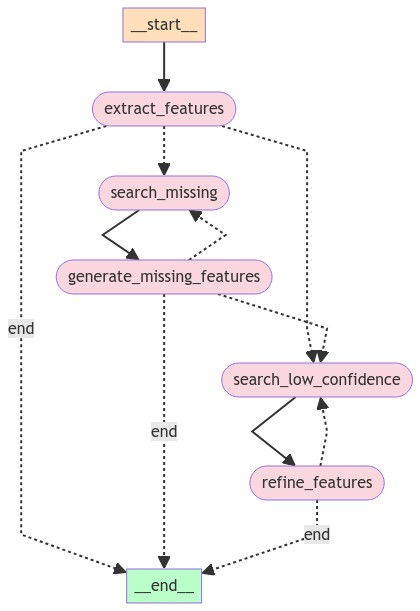

In [6]:
display(Image(feature_extraction.workflow.get_graph().draw_mermaid_png()))

In [7]:
text = raw_data.tail(1)["raw_data"].values[0]
text

'A Mini PC User Gride afn A Mini PC A Mini PC User Guide Notice Packing List Product Introduction Brief Specifications Install Dimension Interfaces Jetpack KEY FEATURES IN JETPACK Sample Applications Develop Tool Notice Please read manual carefully install operate transport device Ensure correct power range used powering device Avoid hot plugging To properly turn power please shut Ubuntu system first cut power Due particularity Ubuntu system Nvidia developer kit power turned startup completed probability abnormality cause device fail start Due use Ubuntu system problem also exists device Do use cables connectors described manual Do use device near strong magnetic fields Backup data transportation device idle Recommend transport device original packaging Packing List A mini PCx Antenna x Power adapterWithout Power cord x afn Processor NVIDIA Jetson Xavier NX AI Performance TOPS INT GPU core NVIDIA Volta GPU Tensor Cores GPU Max Freq MHz A Mini PC Product Introduction Brief A Mini PC pow

In [8]:
await feature_extraction.extract_data(text)

INFO:services.feature_extractor_agent::: Extracting features from raw data ::
INFO:services.feature_extractor_agent::: Generating response, 
user message: Raw product data: A Mini PC User Gride afn A Mini PC A Mini PC User Guide Notice Packing List Product Introduction Brief Specifications Install Dimension Interfaces Jetpack KEY FEATURES IN JETPACK Sample Applications Develop Tool Notice Please read manual carefully install operate transport device Ensure correct power range used powering device Avoid hot plugging To properly turn power please shut Ubuntu system first cut power Due particularity Ubuntu system Nvidia developer kit power turned startup completed probability abnormality cause device fail start Due use Ubuntu system problem also exists device Do use cables connectors described manual Do use device near strong magnetic fields Backup data transportation device idle Recommend transport device original packaging Packing List A mini PCx Antenna x Power adapterWithout Power cor

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:services.feature_extractor_agent::: Response generated: {'name': Feature(value='Mini PC', confidence=1), 'manufacturer': Feature(value='Not available', confidence=0), 'form_factor': Feature(value='Dimensions: 100mm x 70mm x 45mm', confidence=0.9), 'processor': Feature(value='NVIDIA Jetson Xavier NX', confidence=1), 'core_count': Feature(value='6', confidence=1), 'processor_tdp': Feature(value='Not available', confidence=0), 'memory': Feature(value='8GB 128-bit LPDDR4x 1600MHz', confidence=1), 'io': Feature(value='HDMI x1, USB Type-A x4, microUSB x1, RJ45 Ethernet x1, SIM Card Slot x1', confidence=1), 'operating_system': Feature(value='Ubuntu with NVIDIA L4T', confidence=1), 'environmentals': Feature(value='Operating Temperature: -25°C to 80°C, Storage Temperature: -40°C to 85°C, Storage Humidity: 5% to 95% non-condensing', confidence=1), 'certifications': Feature(value='Not available', confi

{'name': 'Mini PC',
 'manufacturer': 'NVIDIA',
 'form_factor': 'Dimensions: 100mm x 70mm x 45mm',
 'processor': 'NVIDIA Jetson Xavier NX',
 'core_count': '6',
 'processor_tdp': '15W',
 'memory': '8GB 128-bit LPDDR4x 1600MHz',
 'io': 'HDMI x1, USB Type-A x4, microUSB x1, RJ45 Ethernet x1, SIM Card Slot x1',
 'operating_system': 'Ubuntu with NVIDIA L4T',
 'environmentals': 'Operating Temperature: -25°C to 80°C, Storage Temperature: -40°C to 85°C, Storage Humidity: 5% to 95% non-condensing',
 'certifications': 'Not available',
 'short_summary': 'A powerful and compact AI edge computer with NVIDIA Jetson Xavier NX, suitable for smart cities, security, and industrial automation.',
 'full_summary': 'The Mini PC is a powerful and extremely small intelligent edge computer featuring the NVIDIA Jetson Xavier NX processor. It delivers AI performance of up to 21 TOPS and is ideal for applications in smart cities, security, industrial automation, and smart factories. It includes a rich set of I/Os 

In [12]:
text = raw_data.tail(10)["raw_data"].values[7]
text

'Industrial Motherboards Systems Features Supports Intel Xeon th Gen Core mobile processor BGA Intel QMCM chipset Two pin SODIMM GB DDR MHz SDRAM Supports triple display Dual DPHDMILVDSeDP Supports PCIe x Gen MiniPCIe M USB USB SATAIII Supports Intel vPro AMT TPM optional Supports WISE PaaSRMM Embedded Software APIs AIMB Intel Xeon Core iii MiniITX Dual DPHDMILVDSeDP COM Dual LAN PCIe x M DDR Specifications Processor System CPU iEQ iEQ iEQ EM v Core Number Max Speed GHz GHz GHz GHz Intel Smart Cache M M M M TDP W W W W Chipset QM QM QM CM BIOS AMI EFI Mbit SPI Expansion Slot M B key SSD G supported Type mm MiniPCIe PCIe x Gen GBs per direction slot Memory Technology Dual Channel DDR MHz SDRAM Max Capacity GB GB per SODIMM ECC memory support AIMBWG Socket x PIN DDR SODIMM Graphics Controller Supports OpenGL x DirectX OpenCL X VRAM Shared system memory GB total system memory shared GB maximum video memory LVDS Supports dual channel bit x HDMI Yes supports max resolution x Hz HDMI eDP Yes

In [13]:
await feature_extraction.extract_data(text)

INFO:services.feature_extractor_agent::: Extracting features from raw data ::
INFO:services.feature_extractor_agent::: Generating response, 
user message: Raw product data: Industrial Motherboards Systems Features Supports Intel Xeon th Gen Core mobile processor BGA Intel QMCM chipset Two pin SODIMM GB DDR MHz SDRAM Supports triple display Dual DPHDMILVDSeDP Supports PCIe x Gen MiniPCIe M USB USB SATAIII Supports Intel vPro AMT TPM optional Supports WISE PaaSRMM Embedded Software APIs AIMB Intel Xeon Core iii MiniITX Dual DPHDMILVDSeDP COM Dual LAN PCIe x M DDR Specifications Processor System CPU iEQ iEQ iEQ EM v Core Number Max Speed GHz GHz GHz GHz Intel Smart Cache M M M M TDP W W W W Chipset QM QM QM CM BIOS AMI EFI Mbit SPI Expansion Slot M B key SSD G supported Type mm MiniPCIe PCIe x Gen GBs per direction slot Memory Technology Dual Channel DDR MHz SDRAM Max Capacity GB GB per SODIMM ECC memory support AIMBWG Socket x PIN DDR SODIMM Graphics Controller Supports OpenGL x DirectX 

{'name': 'Industrial Motherboard',
 'manufacturer': 'Advantech',
 'form_factor': 'Mini-ITX',
 'processor': 'Intel Xeon/Core i3',
 'core_count': 'up to 4 cores',
 'processor_tdp': '25W, 35W, 45W',
 'memory': 'DDR4 2133MHz SDRAM, up to 32GB',
 'io': 'HDMI, Display Port, Ethernet, USB, Audio, Serial RS-232',
 'operating_system': 'WISE-PaaS/RMM, Embedded Software APIs',
 'environmentals': 'Operating Temperature: 0°C to 60°C (32°F to 140°F)',
 'certifications': 'RoHS Compliant',
 'short_summary': 'Supports Intel Xeon/Core i3 processors, Mini-ITX form factor, multiple display outputs, and various I/O interfaces.',
 'full_summary': 'The Advantech Industrial Motherboard supports Intel Xeon and Core i3 processors, features a Mini-ITX form factor, and offers multiple display outputs including HDMI, Display Port, and LVDS. It supports up to 32GB of DDR4 2133MHz SDRAM and provides various I/O interfaces such as Ethernet, USB, and Serial RS-232.',
 'full_product_description': 'The Advantech Industr

### Generate features for all products

In [22]:
import logging


In [23]:
logging.basicConfig(level=logging.WARN)
extracted_data = []
i = 0

for header, subheader in raw_data[["id", "raw_data"]][700:800].values:
    try:
        data = await feature_extraction.extract_data(subheader)
        extracted_data.append({"id": header, "data": data})
    except Exception as e:
        logging.warn(f"Error: {e}")
        extracted_data.append({"id": header, "data": None})
    i += 1
    if i % 10 == 0:
        logging.warn(f"Processed {i} products")

extracted_data = pd.DataFrame(extracted_data)
extracted_data.info()

extracted_data.to_csv("../data/extracted_data.csv", index=False)

INFO:services.feature_extractor_agent::: Extracting features from raw data ::
INFO:services.feature_extractor_agent::: Generating response, 
user message: Raw product data: genuLCDD Series genuLCDD Nontouch genuLCDDCLB Nontouch w CLB genuLCDDT Resistive touch genuLCDDCTCLB Capacitive touch w CLB Datasheet Revision Copyright D Systems Content may change time Please refer resource centre latest documentation Contents Description Features Hardware Overview Hardware Interface Pins Serial Ports TTL Level Serial General Purpose IO System Pins Alternate Pin Function Overview SPI IC Pulse Out PWM Out Pin Counter Quadrature In Analog Inputs Module Features DIABLO Processor Audio SDSDHC Memory Cards FAT Application PCB Support RF EMI Shielding Support DisplayModule Precautions Hardware Tools D Programming CableAdaptor Programming Language Workshop IDE PmmC Programming D Systems DATASHEET Page Display Module Part Numbers Cover Lens Bezel Tape Spec FFC Cable Starter Kit Mechanical Details Resistiv

Error in Tavily search: 400 Client Error: Bad Request for url: https://api.tavily.com/search


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:services.feature_extractor_agent::: Response generated: {'name': Feature(value='Geniodt Resistive Touch', confidence=0.9), 'manufacturer': Feature(value='D Systems', confidence=1.0), 'form_factor': Feature(value='Not available', confidence=0.0), 'processor': Feature(value='ESP SoC', confidence=0.9), 'core_count': Feature(value='Not available', confidence=0.0), 'processor_tdp': Feature(value='Not available', confidence=0.0), 'memory': Feature(value='SD card socket, FAT/FAT32 formatted cards', confidence=0.8), 'io': Feature(value='Pin ZIF socket, FFC cable', confidence=0.8), 'operating_system': Feature(value='Arduino IDE with ESP core', confidence=0.9), 'environmentals': Feature(value='Not available', confidence=0.0), 'certifications': Feature(value='FCC', confidence=0.8), 'short_summary': Feature(value='The genIoD Internet Displays series is part of the latest gen range of modules designed an

Error in Tavily search: HTTPSConnectionPool(host='api.tavily.com', port=443): Read timed out. (read timeout=100)


INFO:openai._base_client:Retrying request to /chat/completions in 1.650022 seconds
ERROR:services.openai_service:Error in OpenAI API call: Connection error.
/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_3773/3541987948.py:10: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"Error: {e}")
INFO:services.feature_extractor_agent::: Extracting features from raw data ::
INFO:services.feature_extractor_agent::: Generating response, 
user message: Raw product data: ExpressBD COM Express Basic Size Type Module Intel Xeon D SoC SODIMMs Features SODIMMs GB dual channel DDR MHz ECC dependent SoC SKU Intel Xeon D SoC cores Two G Ethernet NCSI support Up PCIe lanes x Gen x Gen GbE two SATA Gbs four USB Supports Smart Embedded Management Agent SEMA functions Extreme Rugged operating temperature C C build option selected SoC SKU Specifications Core System CPU Intel Xeon D Pentium D SoC nm process formerlyBroadwellDE Xeon D GHz MB W C eTEMP Xeon 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    object
 1   data    29 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB
